In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

In [7]:
df = pd.DataFrame(x, columns = ['c1', 'c2', 'c3', 'c4', 'c5'])
df['target'] = y
df

,c1,c2,c3,c4,c5,target
0,-2.950228,-2.595223,2.614768,2.492563,0.875061,0
1,-2.496850,-2.154809,2.228377,-0.942411,0.750886,0
2,0.145725,-1.835389,-0.779830,0.444769,-2.766285,1
3,-2.028484,-1.896617,1.183155,0.149504,-0.760887,1
4,-2.482604,0.359933,1.265533,1.726890,0.704955,1
...,...,...,...,...,...,...
95,-1.071670,-0.157812,-2.492607,-1.671529,1.282526,0
96,-0.031806,0.339325,-0.804034,-1.337851,0.918925,0
97,-1.264990,-0.780515,-0.492403,-1.678852,1.460734,0
98,-2.661564,-2.368808,2.205158,0.857733,2.356695,1


In [8]:
df.shape

(100, 6)

In [9]:
#Function for row sampling

def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace = True)

In [29]:
# Function for the feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1]-1)))
    return df[cols]

In [12]:
#function row+column
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [13]:
df1 = sample_rows(df, 0.2)

In [14]:
df2 = sample_rows(df, 0.2)

In [15]:
df3 = sample_rows(df, 0.2)

In [16]:
df1.shape

(20, 6)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.375, 0.875, 'x[4] <= -0.788\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.625, 'x[2] <= 2.977\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.25, 0.375, 'x[3] <= 2.154\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.375, 'x[3] <= -0.464\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

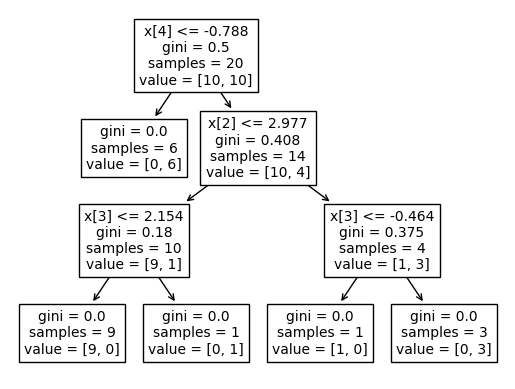

In [22]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.293\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.5, 'x[1] <= 0.845\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

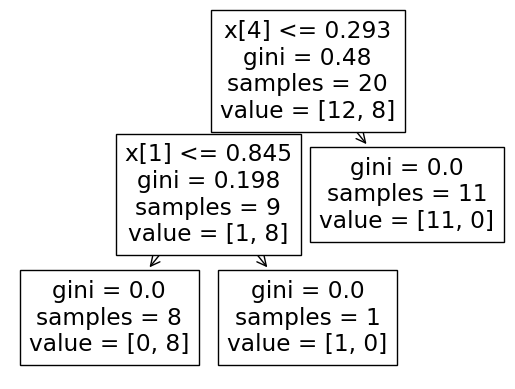

In [23]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.356\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.5, 'x[3] <= 0.563\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

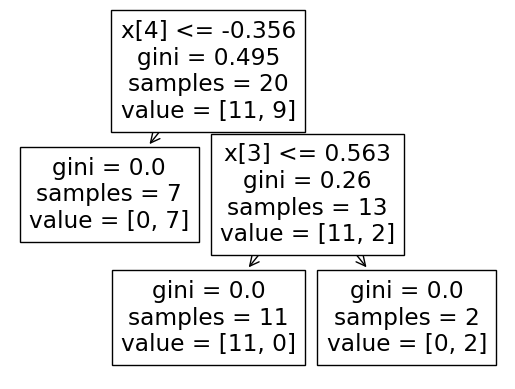

In [24]:
plot_tree(clf3)

In [26]:
clf1.predict(np.array([0.145725, -1.835389, -0.779830, 0.444769, -2.766285]).reshape(1,5))

C:\Users\jalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf2.predict(np.array([0.145725, -1.835389, -0.779830, 0.444769, -2.766285]).reshape(1,5))

C:\Users\jalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf3.predict(np.array([0.145725, -1.835389, -0.779830, 0.444769, -2.766285]).reshape(1,5))

C:\Users\jalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])